<a href="https://colab.research.google.com/github/mchyan98/CSE163/blob/master/Part_2_Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import os
import sklearn
import plotly.graph_objects as go
from datetime import datetime
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Isolate 500 stocks in S&P 500
tickers = pd.read_csv('/content/drive/My Drive/CSE163 Final Project/CSE163/sp500 companies and sectors.csv')
tickers_sectors = tickers[['Symbol', 'Sector']]
sector_dict = dict(zip(tickers_sectors.Symbol, tickers_sectors.Sector))
tickers_sectors.head(5)

,Symbol,Sector
0,MMM,Industrials
1,AOS,Industrials
2,ABT,Health Care
3,ABBV,Health Care
4,ACN,Information Technology


In [6]:
sp_all = pd.read_csv('/content/drive/My Drive/CSE163 Final Project/CSE163/2013-2018/all_stocks_5yr.csv')
sp_all.head(5)
len(sp_all)

619040

In [7]:
sp500_industry = tickers_sectors.merge(sp_all, left_on='Symbol', right_on='Name')
sp500_industry = sp500_industry.drop(['Name', 'volume'], axis=1)
sp500_industry.head(5)

,Symbol,Sector,date,open,high,low,close
0,MMM,Industrials,2013-02-08,102.34,103.330,102.0400,102.66
1,MMM,Industrials,2013-02-11,102.39,102.880,102.0401,102.62
2,MMM,Industrials,2013-02-12,102.66,103.590,102.6300,103.46
3,MMM,Industrials,2013-02-13,103.03,103.395,102.5800,102.86
4,MMM,Industrials,2013-02-14,102.43,103.140,102.2200,102.78


In [36]:
sp500_groupby = sp500_industry.groupby(['Sector', 'date'], as_index=False)['close'].sum()
sp500_groupby.head(5)
sectors = sp500_groupby['Sector'].unique()
print(sectors)
print('Health Care' in sectors)

['Consumer Discretionary' 'Consumer Staples' 'Energy' 'Financials'
 'Health Care' 'Industrials' 'Information Technology' 'Materials'
 'Real Estate' 'Telecommunication Services' 'Utilities']
True


# New Section

In [0]:
index = pd.read_csv('/content/drive/My Drive/CSE163 Final Project/CSE163/actual sp500 index.csv')

In [0]:
df_dict = {}
directory_name = '/content/drive/My Drive/CSE163 Final Project/CSE163/fh_20190420/full_history'
for file_name in os.listdir(directory_name):
  if file_name.replace('.csv', '') in sector_dict:
    df = pd.read_csv(directory_name + '/' + file_name)
    df = df.drop(['volume'], axis=1)
    df['date'] = pd.to_datetime(df['date'])
    mask = (df['date'] > '2007-7-1') & (df['date'] <= '2011-7-1')
    df['sector'] = sector_dict[file_name.replace('.csv', '')]
    df = df.loc[mask]
    sector_name = sector_dict[file_name.replace('.csv', '')]
    if sector_name not in df_dict:
      df_dict[sector_name] = df.copy()
      sector_list.append(sector_name)
    else:
      df_dict[sector_name] = pd.concat((df_dict[sector_name], df))
      df_dict[sector_name] = df_dict[sector_name].groupby('date').mean()
      df_dict[sector_name] = df_dict[sector_name].reset_index()

<Figure size 432x288 with 0 Axes>

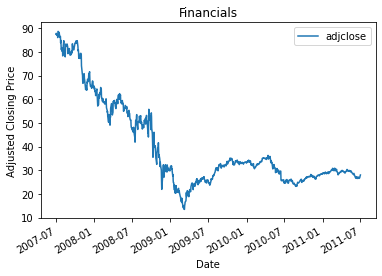

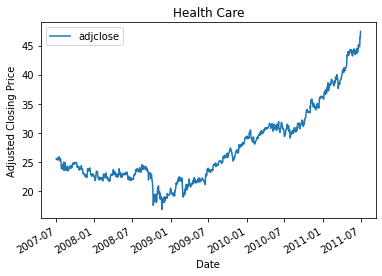

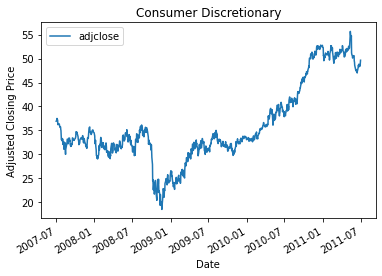

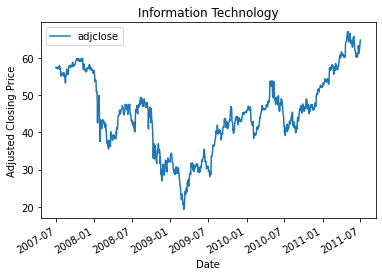

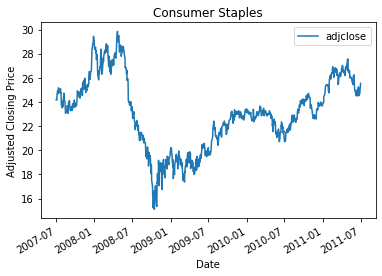

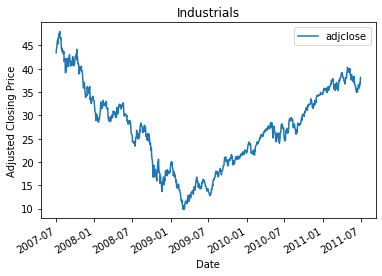

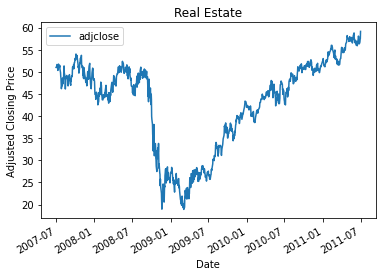

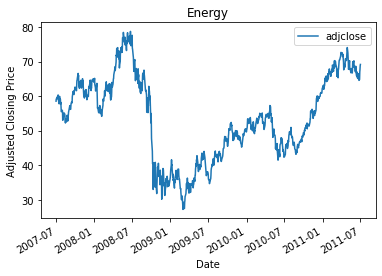

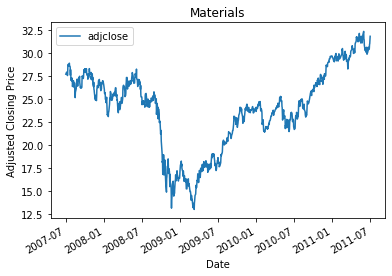

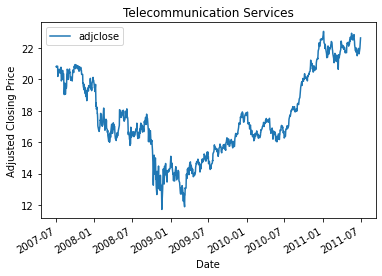

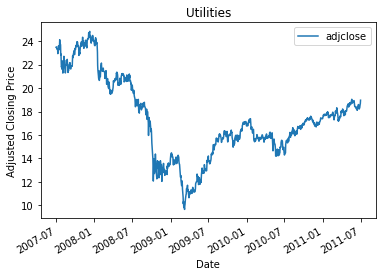

In [196]:
fig = plt.figure()
for sector in df_dict:
  df_dict[sector].plot(x='date', y='adjclose')
  plt.title(sector)
  plt.xlabel('Date')
  plt.ylabel('Adjusted Closing Price')
  plt.show()

In [205]:
for sector in df_dict:
  fig = go.Figure(data=[go.Candlestick(x=df_dict[sector]['date'],
                open=df_dict[sector]['open'], high=df_dict[sector]['high'],
                low=df_dict[sector]['low'], close=df_dict[sector]['close'])
                     ])
  fig.update_layout(
    title=sector,
    xaxis_title='Date',
    yaxis_title='Adjusted Closing Price',
    xaxis_rangeslider_visible=False
  )
  fig.show()